In [78]:
from string import ascii_letters
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC, SVC
# from sklearn.utils import resample
# from sklearn.feature_extraction.text import TfidfVectorizer
#
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

# Tensorflow
# import tensorflow as tf
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Embedding, Flatten, CuDNNLSTM, Bidirectional, Input, concatenate, Dropout

# Numpy
import numpy as np
from numpy import zeros

# Gemsim
# import gensim.models

In [146]:
min_val = 5
# repo_name = f"174repos_min{min_val}_max1000000_expanded"
repo_name = f"300repos_min{min_val}_max1000000_expanded"
df = pd.read_csv('../features/'+ repo_name +'.csv')
# df = pd.read_csv('../features/100repos_expanded.csv')
# df = pd.read_csv('../features/combination.csv')
# df = pd.read_csv('../features/viewfinder.csv')
# df = pd.read_csv('../features/web2py.csv')

no_log_cnt, log_cnt = df['contains_logging'].value_counts()
par_vec_cnt = no_log_cnt + log_cnt
log_ratio = log_cnt / par_vec_cnt
print(f"Number of parameter vecs:\t\t{par_vec_cnt}")
print(f"without logging (negatives):\t{no_log_cnt}")
print(f"with logging (positives):\t\t{log_cnt}")
print(f"Log ratio:\t\t\t\t\t\t{log_ratio * 100:.2f}%")
print(df.shape)
df.head()

Number of parameter vecs:		2769568
without logging (negatives):	2712870
with logging (positives):		56698
Log ratio:						2.05%
(2769568, 31)


,type,location,parent,context,contains_class_definition,contains_function_definition,contains_if_statement,contains_for_statement,contains_match_statement,contains_while_statement,...,contains_exec_statement,contains_future_import_statement,contains_global_statement,contains_nonlocal_statement,contains_print_statement,contains_assignment,contains_call,contains_await,contains_yield,contains_logging
0,f,48;0-51;5,a,azAAAqrqqqqrqrrqrqrrrrrqqfrr,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,f,56;0-59;5,a,azAAAqrqqqqrqrrqrqrrrrrqqfrrrrrfrr,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,d,16;0-21;5,a,dr,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,d,24;0-29;5,a,dr,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,c,24;0-159;53,a,cqqdeyreyreyrqreerqqqrqreqrqudqfrerryrrrudurdur,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
df[df.parent == 'b']
# df[df.parent == 'b'].type == 'b'

,type,location,parent,context,contains_class_definition,contains_function_definition,contains_if_statement,contains_for_statement,contains_match_statement,contains_while_statement,...,contains_exec_statement,contains_future_import_statement,contains_global_statement,contains_nonlocal_statement,contains_print_statement,contains_assignment,contains_call,contains_await,contains_yield,contains_logging
34131,b,1202;8-1203;53,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202723,b,181;8-182;50,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202724,b,201;8-202;50,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202725,b,220;8-221;50,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202726,b,239;8-240;50,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645012,b,753;8-754;23,b,b,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2645013,b,758;8-761;31,b,b,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2645014,b,762;8-763;37,b,b,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2645029,b,760;8-761;31,b,b,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [148]:
df = df[df.parent != 'b']

In [149]:
# df.context = [list(map(lambda y: str(ascii_letters.index(y)), list(str(x)))) for x in df.context]
df[df.type == 'b']

,type,location,parent,context,contains_class_definition,contains_function_definition,contains_if_statement,contains_for_statement,contains_match_statement,contains_while_statement,...,contains_exec_statement,contains_future_import_statement,contains_global_statement,contains_nonlocal_statement,contains_print_statement,contains_assignment,contains_call,contains_await,contains_yield,contains_logging


In [102]:
score_names = [
    "BalAcc",
    "Prec",
    "Rec",
    "F1"
]

In [91]:
# Simple run
X = df.drop(["contains_logging", "location", "context"], axis=1)
X = pd.get_dummies(X, columns=["type", "parent"])
y = df.contains_logging
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

BalAcc    0.594
Prec      0.919
Rec       0.189
F1        0.314
dtype: float64


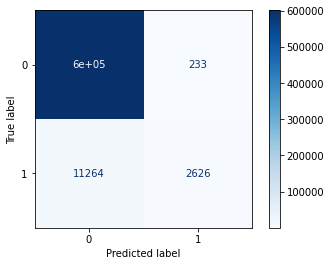

In [92]:
# Simple run
# classifier = RandomForestClassifier(n_estimators=9, random_state=0, n_jobs=14, class_weight={False: 1, True: 4.5})
classifier = RandomForestClassifier(n_estimators=9, random_state=0, n_jobs=14)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores = [
                balanced_accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test, y_pred, average='binary', pos_label=True)
        ]
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
score_df = pd.DataFrame([scores], columns=score_names).mean().round(3)
print(score_df)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

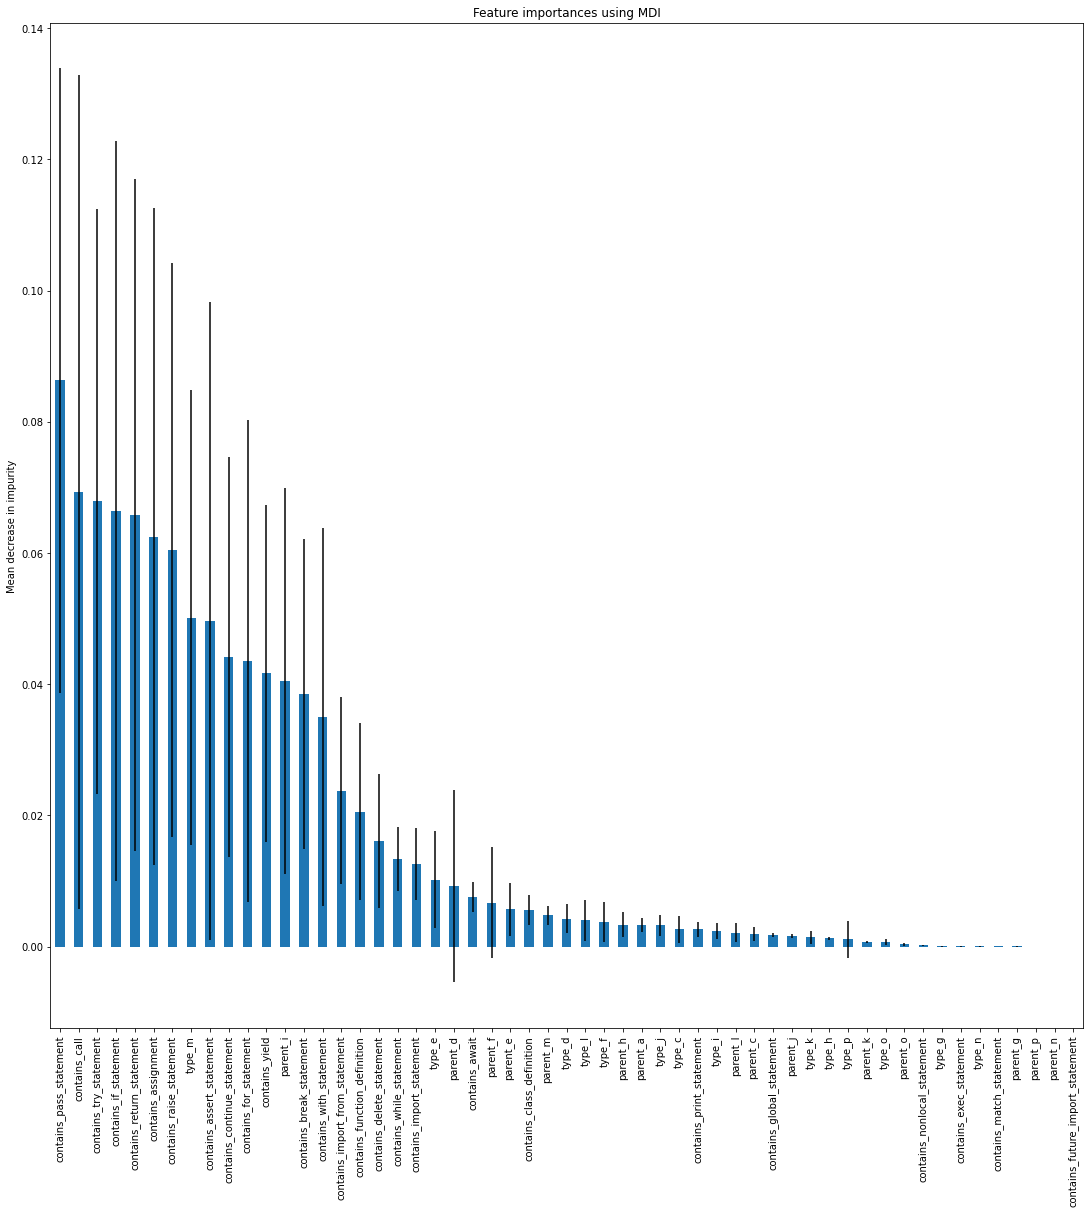

In [77]:
# Simple run
# Feature importance based on mean decrease in impurity
sort_importances = True

importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
if sort_importances:
    importances,std,columns = list(zip(*sorted(list(zip(importances, std, X.columns)), reverse=True)))
else:
    columns = X.columns

forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(18.5, 18.5)

In [79]:
# Simple run
# Feature importance based on feature permutation
result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=0, n_jobs=14)
forest_importances = pd.Series(result.importances_mean, index=X.columns)

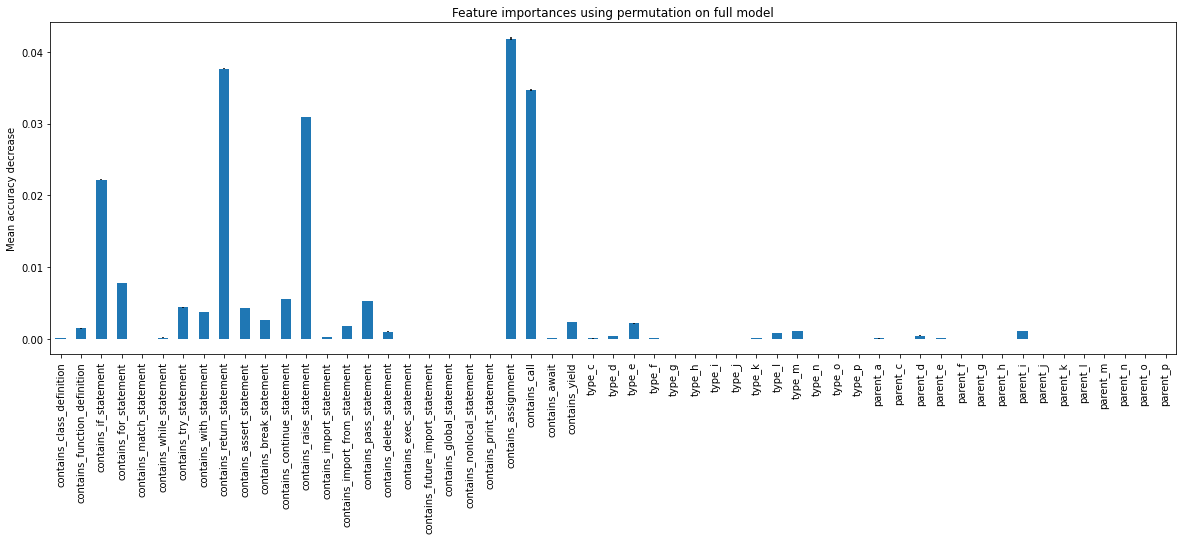

In [80]:
# Simple run
# Feature importance based on feature permutation
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 18.5)
plt.show()

In [151]:
# Testing, manual folds
num_outer_loops = 10

# Hyper Params
n_estimators = 31
min_samples_split = 5
min_samples_leaf = 1
max_depth = None
class_weight = {False: 1, True: 4}

hy_pars = [
    n_estimators,
    min_samples_split,
    min_samples_leaf,
    max_depth,
    class_weight
]

hy_par_names = [
    "n_estimators",
    "min_samples_split",
    "min_samples_leaf",
    "max_depth",
    "class_weight"
]

df_regular = df.drop(["context"], axis=1)

dataframes = [
    ("Regular", df_regular),
    # ("corpus", df_corpus_embeddings.join(pd.DataFrame(df.contains_logging))),
    # ("tf-idf", df_tfidf.join(pd.DataFrame(df.contains_logging))),
    # ("regular+corpus", df_regular.join(df_corpus_embeddings)),
    # ("regular+tfidf", df_regular.join(df_tfidf)),
    # ("corpus+tfidf", df_corpus_embeddings.join(df_tfidf).join(pd.DataFrame(df.contains_logging))),
    # ("regular+corpus+tfidf", df_regular.join(df_corpus_embeddings).join(df_tfidf)),
]
for df_name, df_used in dataframes:
    print(df_name)
    df_scores = []
    # df_cm = []
    X = df_used.drop(["contains_logging", "location"], axis=1) # No "location" in older combination.csv
#     X = df_used.drop(["contains_logging"], axis=1)
    if "Regular" in df_name:
        X = pd.get_dummies(X, columns=["type", "parent"])
    y = df_used.contains_logging
    for i in range(num_outer_loops):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y) # No random state
        classifier = RandomForestClassifier(n_estimators=n_estimators, n_jobs=14,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           max_depth=max_depth,
                                           class_weight=class_weight)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        scores = [
                balanced_accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test, y_pred, average='binary', pos_label=True)
        ]
        df_scores.append(scores)
        # cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
        # df_cm.append(cm)
    df_scores = np.mean(df_scores, axis=0).round(3)
    col_names = ["Repo"] + hy_par_names + score_names
    df_scores = [repo_name] + hy_pars + list(df_scores)
    
    df_scores = pd.DataFrame([df_scores], columns=col_names)#.mean().round(3)
    print(df_scores)
    df_scores: DataFrame
    df_scores.to_csv("NoFoldTesting.csv", mode="a", index=False, na_rep="None", header=False)
#     df_scores.to_csv("NoFoldTesting.csv", mode="a", index=False, na_rep="None")

Regular
0
1
2
3
4
5
6
7
8
9
                                Repo  n_estimators  min_samples_split  \
0  300repos_min5_max1000000_expanded            31                  5   

   min_samples_leaf max_depth         class_weight  BalAcc   Prec   Rec     F1  
0                 1      None  {False: 1, True: 4}   0.627  0.542  0.26  0.351  


In [131]:
X = df.drop(["contains_logging", "location", "context"], axis=1) # No "location" in older combination.csv
# X = df.drop(["contains_logging", "context"], axis=1)
X = pd.get_dummies(X, columns=["type", "parent"])
y = df.contains_logging

In [137]:
# GridSearch hyper param opt
random_state = None

n_estimators = [9,31,50,100]
min_samples_split = [5]
min_samples_leaf = [1,2,4]
max_depth = [2,3,4,None]
class_weight = [
#     {False: 1, True: 1},
#     {False: 1, True: 2},
#     {False: 1, True: 2.5},
#     {False: 1, True: 2.95},
    {False: 1, True: 3},
    {False: 1, True: 4},
    {False: 1, True: 5},
]

param_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
              'class_weight': class_weight
              }

search = GridSearchCV(estimator = RandomForestClassifier(random_state=random_state), # Makes sense to set state here?
# search = GridSearchCV(estimator = RandomForestClassifier(), # Makes sense to set state here?
                        param_grid = param_grid,
                        n_jobs=12,
                        scoring='f1',
                        cv=5,
                      verbose=1
                      )
search.fit(X, y)
print(search.best_params_)
print(search.best_score_)

out = open("GridsearchResults", "a")
out.write(repo_name)
out.write("\n")
out.write("Best_Params = ")
out.write(str(search.best_params_))
out.write("\n")
out.write("Best_Score = ")
out.write(str(search.best_score_))
out.write("\n")
out.close()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'class_weight': {False: 1, True: 4}, 'min_samples_split': 5, 'n_estimators': 31}
0.34899632615667503
